In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Rachana\\Downloads\\Chicago_Crime_Detective.csv ")

C:\Users\Rachana\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.tail()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
191636,191636,1310068,1/1/01 0:05,STREET,False,False,1123,NaN,NaN,2001
191637,191637,1313404,1/1/01 0:01,STREET,False,False,2023,NaN,NaN,2001
191638,191638,1313442,1/1/01 0:01,STREET,False,False,911,NaN,NaN,2001
191639,191639,1563324,1/1/01 0:01,STREET,False,False,1712,NaN,NaN,2001
191640,191640,1310463,1/1/01 0:01,STREET,False,False,1911,NaN,NaN,2001


In [4]:
date=list(df.Date.sort_values())

In [5]:
print(len(date)//2)

95820


In [6]:
df['Date'].astype('datetime64[ns]').quantile(.5)

Timestamp('2006-05-21 12:30:00')

In [9]:
#month of maximum theft
df['month']=pd.DatetimeIndex(df['Date']).month
#df.head()

In [37]:
x=df.groupby('month')
x['month'].value_counts()


month  month
1      1        16047
2      2        13511
3      3        15758
4      4        15280
5      5        16035
6      6        16002
7      7        16801
8      8        16572
9      9        16060
10     10       17086
11     11       16063
12     12       16426
Name: month, dtype: int64

In [71]:
import datetime as dt
import dateutil


In [73]:
#weekday theft
#df['Date']=df['Date'].apply(dateutil.parser.parse,dayfirst=True)
wd=df['Date'].dt.weekday_name

In [74]:
wd.value_counts()

Friday       28545
Saturday     27406
Wednesday    27387
Monday       27372
Tuesday      27141
Thursday     27067
Sunday       26723
Name: Date, dtype: int64

In [79]:
#month of maximum arrest
x=df.groupby('month')
x['Arrest'].value_counts()

month  Arrest
1      False     14612
       True       1435
2      False     12273
       True       1238
3      False     14460
       True       1298
4      False     14028
       True       1252
5      False     14848
       True       1187
6      False     14772
       True       1230
7      False     15477
       True       1324
8      False     15243
       True       1329
9      False     14812
       True       1248
10     False     15744
       True       1342
11     False     14807
       True       1256
12     False     15029
       True       1397
Name: Arrest, dtype: int64

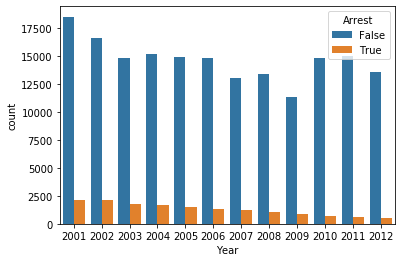

In [106]:
sns.countplot(x='Year',hue='Arrest',data=df)

In [118]:
y=df.groupby('Year')
y['Arrest'].value_counts()

df[df['Arrest']==True ].Year.value_counts()


2001    2152
2002    2115
2003    1798
2004    1693
2005    1528
2006    1302
2007    1212
2008    1020
2009     840
2010     701
2011     625
2012     550
Name: Year, dtype: int64

In [125]:
df.groupby('Year')['Arrest'].value_counts()

Year  Arrest
2001  False     18517
      True       2152
2002  False     16638
      True       2115
2003  False     14859
      True       1798
2004  False     15169
      True       1693
2005  False     14956
      True       1528
2006  False     14796
      True       1302
2007  False     13068
      True       1212
2008  False     13425
      True       1020
2009  False     11327
      True        840
2010  False     14796
      True        701
2011  False     15012
      True        625
2012  False     13542
      True        550
Name: Arrest, dtype: int64

In [126]:
df.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,month
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012,12
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012,12
2,2,8952745,2012-12-31 22:00:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,12
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012,12
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012,12


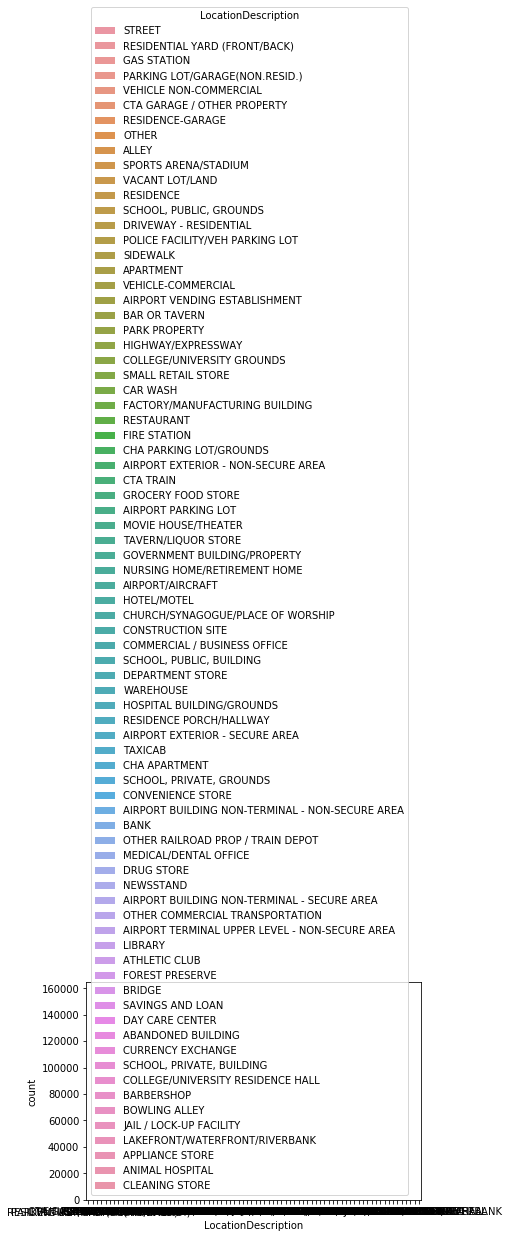

In [130]:
sns.countplot(data=df,x='LocationDescription',hue='LocationDescription')
plt.legend()

In [138]:
df1=df['LocationDescription'].value_counts().head(6).drop('OTHER')
df1.sum()

177510

In [193]:

df['weekdays']=df['Date'].dt.weekday_name
location=df.groupby(['LocationDescription'])['weekdays'].value_counts()
location['STREET']

location['GAS STATION']
#x=location.Date.value_counts()



weekdays
Saturday     345
Sunday       318
Friday       316
Wednesday    294
Monday       287
Thursday     282
Tuesday      269
Name: weekdays, dtype: int64

In [170]:
wd=df['Date'].dt.weekday_name